In [1]:
%load_ext autoreload
%autoreload 2



In [2]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)



In [3]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import pandas as pd
import sbrt_ibict_ml.sbrt_ibict_ml as sbrt
import matplotlib.pyplot as plt
import numpy as np



In [4]:
dossies = sbrt.get_dossies_df(size=50)
corpus = dossies.text
dossies.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   file    50 non-null     object
 1   text    50 non-null     object
dtypes: object(2)
memory usage: 928.0+ bytes


In [5]:
metadados = sbrt.get_dossies_metadados_df(dossies.file)
metadados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   titulo          50 non-null     object
 1   palavras_chave  50 non-null     object
dtypes: object(2)
memory usage: 928.0+ bytes


In [8]:
vectorizer = TfidfVectorizer(stop_words=stopwords.words('portuguese'))
X = vectorizer.fit_transform(corpus)
X.shape



(50, 30704)

In [9]:
agglomerative = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')
agglomerative = agglomerative.fit(X.toarray())
agglomerative


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=0,
                        linkage='complete', memory=None, n_clusters=None)

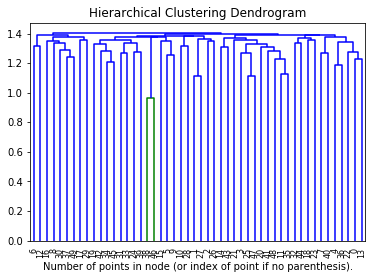

In [10]:
sbrt.plot_dendrogram(agglomerative)
dend_labels = agglomerative.labels_

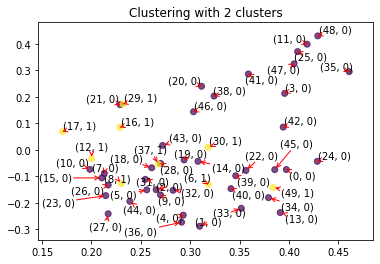

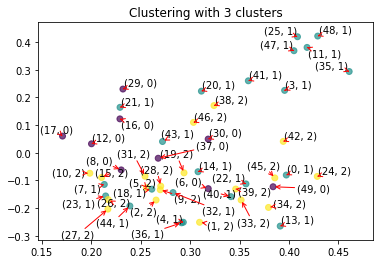

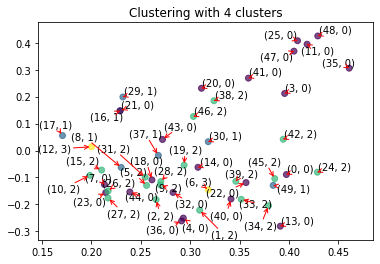

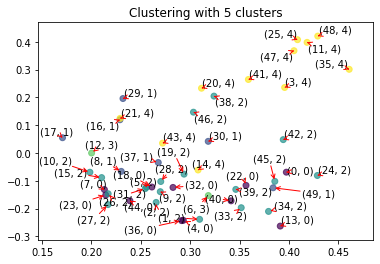

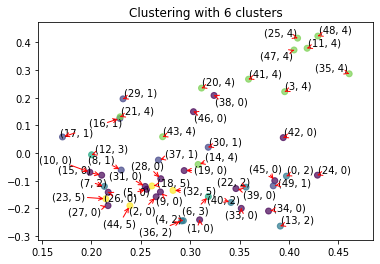

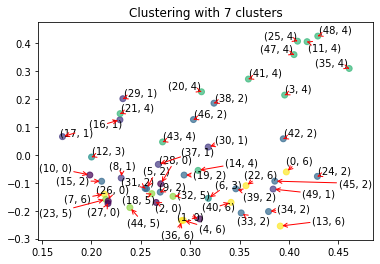

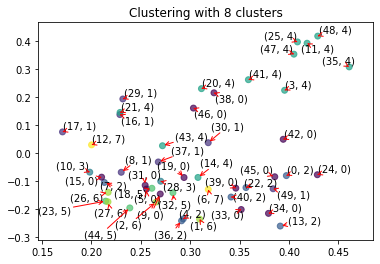

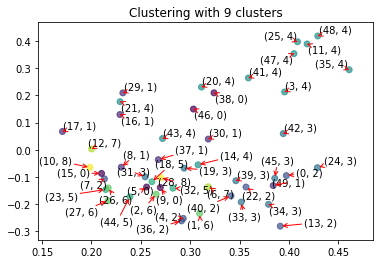

In [24]:
agglomerative.distance_threshold = None
sbrt.plot_N_clusters(agglomerative, X, 10, plot_index_labels=True)
aggl_labels = agglomerative.labels_

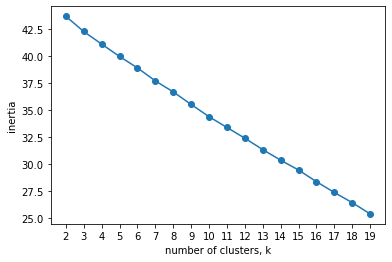

In [29]:
# isso está correto mesmo? apesar da inercia diminuir, parece n convergir
kmeans = KMeans()
sbrt.plot_KMeans_inertia(kmeans, X, 20)

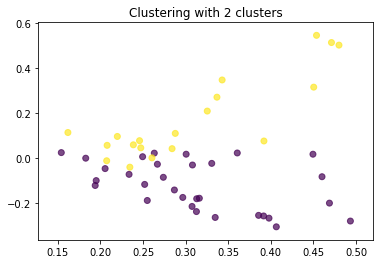

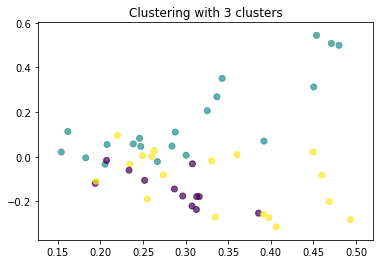

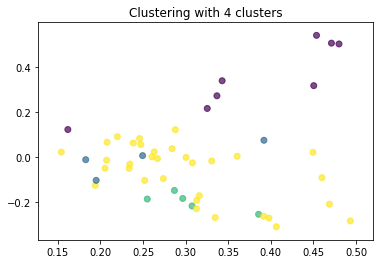

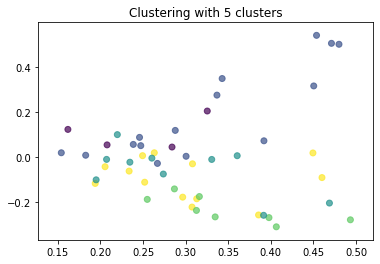

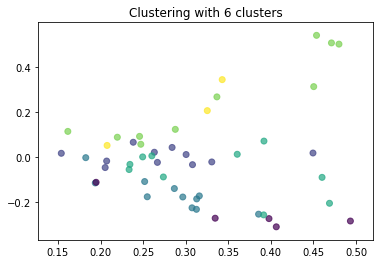

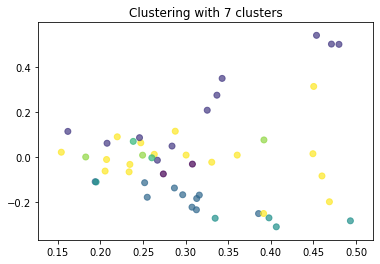

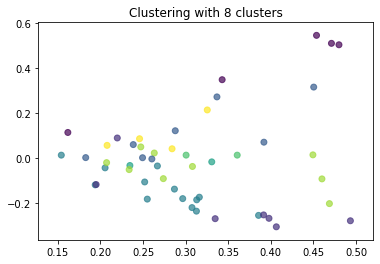

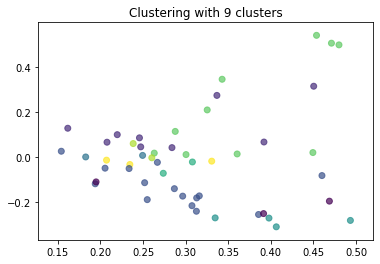

In [30]:
sbrt.plot_N_clusters(kmeans, X, 10)
kmeans_labels = kmeans.labels_